This notebook was written based on this tutorial
https://www.kaggle.com/code/someadityamandal/bitcoin-time-series-forecasting/notebook

In [2]:
!pip install chart_studio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from plotly import tools
# import plotly.plotly as py
from chart_studio import plotly
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import gc

import matplotlib.pyplot as plt
import seaborn as sns

# These were supposed to be able to run. 
# They did from a regular python script
# But not here. I can confirm that a different piece of code can do it though
# Which is more frustrating.
# from subprocess import check_output
# print(check_output(["ls", "./data"]).decode("utf8"))
import os
print(os.listdir('./data'))

['coinbaseUSD.csv', 'bitstampUSD.csv']


In [3]:
import datetime, pytz

def dateparse (time_in_secs):
    return pytz.utc.localize(datetime.datetime.fromtimestamp(float(time_in_secs)))

data = pd.read_csv('./data/coinbaseUSD.csv', parse_dates=[0], date_parser=dateparse)

data.info()

print(data.head())

/tmp/ipykernel_314989/4088222308.py:6: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099760 entries, 0 to 2099759
Data columns (total 8 columns):
 #   Column             Dtype              
---  ------             -----              
 0   Timestamp          datetime64[ns, UTC]
 1   Open               float64            
 2   High               float64            
 3   Low                float64            
 4   Close              float64            
 5   Volume_(BTC)       float64            
 6   Volume_(Currency)  float64            
 7   Weighted_Price     float64            
dtypes: datetime64[ns, UTC](1), float64(7)
memory usage: 128.2 MB
                  Timestamp   Open   High    Low  Close  Volume_(BTC)  \
0 2014-11-30 23:33:00+00:00  300.0  300.0  300.0  300.0          0.01   
1 2014-11-30 23:34:00+00:00    NaN    NaN    NaN    NaN           NaN   
2 2014-11-30 23:35:00+00:00    NaN    NaN    NaN    NaN           NaN   
3 2014-11-30 23:36:00+00:00    NaN    NaN    NaN    NaN           NaN   
4 2014-11-30 23:3

In [4]:
data['Volume_(BTC)'].fillna(value=0, inplace=True)
data['Volume_(Currency)'].fillna(value=0, inplace=True)
data['Weighted_Price'].fillna(value=0, inplace=True)

data['Open'].fillna(method='ffill', inplace=True)
data['High'].fillna(method='ffill', inplace=True)
data['Low'].fillna(method='ffill', inplace=True)
data['Close'].fillna(method='ffill', inplace=True)

print(data.head())

                  Timestamp   Open   High    Low  Close  Volume_(BTC)  \
0 2014-11-30 23:33:00+00:00  300.0  300.0  300.0  300.0          0.01   
1 2014-11-30 23:34:00+00:00  300.0  300.0  300.0  300.0          0.00   
2 2014-11-30 23:35:00+00:00  300.0  300.0  300.0  300.0          0.00   
3 2014-11-30 23:36:00+00:00  300.0  300.0  300.0  300.0          0.00   
4 2014-11-30 23:37:00+00:00  300.0  300.0  300.0  300.0          0.00   

   Volume_(Currency)  Weighted_Price  
0                3.0           300.0  
1                0.0             0.0  
2                0.0             0.0  
3                0.0             0.0  
4                0.0             0.0  


/tmp/ipykernel_314989/537992000.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipykernel_314989/537992000.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' 

In [5]:
start = datetime.datetime(2015, 1, 1, 0, 0, 0, 0, pytz.UTC)
end = datetime.datetime(2018, 11, 11, 0, 0, 0, 0, pytz.UTC)

weekly_rows = data[(data['Timestamp'] >= start) & (data['Timestamp'] <= end)].groupby(
    [pd.Grouper(key='Timestamp', freq='W-MON')]).first().reset_index()

print(weekly_rows.head())

                  Timestamp    Open    High     Low   Close  Volume_(BTC)  \
0 2015-01-12 00:00:00+00:00  360.00  360.00  360.00  360.00         0.010   
1 2015-01-19 00:00:00+00:00  260.00  260.00  260.00  260.00         0.000   
2 2015-01-26 00:00:00+00:00  225.51  225.51  225.51  225.51         0.000   
3 2015-02-02 00:00:00+00:00  259.99  259.99  259.99  259.99         0.300   
4 2015-02-09 00:00:00+00:00  239.28  239.50  239.28  239.50        20.675   

   Volume_(Currency)  Weighted_Price  
0           3.600000      360.000000  
1           0.000000        0.000000  
2           0.000000        0.000000  
3          77.997000      259.990000  
4        4951.178693      239.476599  


In [6]:
trace1 = go.Scatter(
    x = weekly_rows['Timestamp'],
    y = weekly_rows['Open'].astype(float),
    mode = 'lines',
    name = 'Open'
)

trace2 = go.Scatter(
    x = weekly_rows['Timestamp'],
    y = weekly_rows['Close'].astype(float),
    mode = 'lines',
    name = 'Close'
)

trace3 = go.Scatter(
    x = weekly_rows['Timestamp'],
    y = weekly_rows['Weighted_Price'].astype(float),
    mode = 'lines',
    name = 'Weighted Avg'
)

layout = dict(
    title='Bitcoin history abriged 2015-2018 w/ slider',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(
                    count=1,
                    label='1m',
                    step='month',
                    stepmode='backward'
                ),
                dict(
                    count=6,
                    label='6m',
                    step='month',
                    stepmode='backward'
                ),
                dict(
                    count=36,
                    label='3y',
                    step='month',
                    stepmode='backward'
                ),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)
# Okay that was NOT fun to type
# Is there an easier way or is that just how formatting is?
# I'll take a look when I get there I suppose

data = [trace1, trace2, trace3]
fig = dict(data=data, layout=layout)
iplot(fig, filename = "time series ranger")

# fig.show()

In [7]:
# Time for adventures in plotting
trace1 = go.Scatter(
    x = weekly_rows['Timestamp'],
    y = weekly_rows['Volume_(Currency)'].astype(float),
    mode = 'lines',
    name = 'Bitcoin Price (Open)')

layout = dict(
    title='Historical Bitcoin Volume',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                    label='1m',
                    step='month',
                    stepmode='backward'),
                dict(count=6,
                    label='6m',
                    step='month',
                    stepmode='backward'),
                dict(count=12,
                    label='1y',
                    step='month',
                    stepmode='backward'),
                dict(count=36,
                    label='3y',
                    step='month',
                    stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

data = [trace1]
fig = dict(data=data, layout=layout)
iplot(fig, filename = 'Time Series w/ Rangeslider')

In [9]:
trace = go.Scattergl(
    y = weekly_rows['Volume_(BTC)'].astype(float),
    x = weekly_rows['Weighted_Price'].astype(float),
    mode = 'markers',
    marker = dict(
        color = '#FFBAD2',
        line = dict(width = 1)
    )
)

layout = go.Layout(
    title='BTC Volume v/s USD',
    xaxis=dict(
        title='Weighted Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Volume BTC',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )))

data = [trace]
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='compare_webgl')

In [10]:
data = pd.read_csv('./data/coinbaseUSD.csv', parse_dates=[0], date_parser=dateparse)
data['Timestamp'] = data['Timestamp'].dt.tz_localize(None)

data = data.groupby([pd.Grouper(key='Timestamp', freq='H')]).first().reset_index()
data = data.set_index('Timestamp')
data = data[['Weighted_Price']]
data['Weighted_Price'].fillna(method='ffill', inplace=True)

/tmp/ipykernel_314989/3787833246.py:1: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.

/tmp/ipykernel_314989/3787833246.py:4: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/tmp/ipykernel_314989/3787833246.py:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipykernel_314989/3787833246.py:7: FutureWarning:

Series.fillna

In [11]:
# splitting data
split_date = '25-Jun-2018'
data_train = data.loc[data.index <= split_date].copy()
data_test = data.loc[data.index > split_date].copy()

In [12]:
# Preprocessing
training_set = data_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
# Ok so there's a lot of imports in random spots
# We'll probably move some over to some different files

sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [13]:
# Time for Keras!!
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation

model = Sequential()

model.add(LSTM(128, activation='sigmoid', input_shape=(1, 1)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/100
625/625 - 6s - 9ms/step - loss: 0.0419
Epoch 2/100
625/625 - 2s - 4ms/step - loss: 0.0131
Epoch 3/100
625/625 - 2s - 4ms/step - loss: 0.0066
Epoch 4/100
625/625 - 2s - 3ms/step - loss: 0.0043
Epoch 5/100
625/625 - 3s - 5ms/step - loss: 0.0034
Epoch 6/100
625/625 - 2s - 3ms/step - loss: 0.0026
Epoch 7/100
625/625 - 2s - 3ms/step - loss: 0.0022
Epoch 8/100
625/625 - 2s - 3ms/step - loss: 0.0019
Epoch 9/100
625/625 - 2s - 3ms/step - loss: 0.0017
Epoch 10/100
625/625 - 2s - 3ms/step - loss: 0.0015
Epoch 11/100
625/625 - 2s - 3ms/step - loss: 0.0013
Epoch 12/100
625/625 - 2s - 4ms/step - loss: 0.0011
Epoch 13/100
625/625 - 2s - 3ms/step - loss: 0.0011
Epoch 14/100
625/625 - 2s - 3ms/step - loss: 9.6513e-04
Epoch 15/100
625/625 - 2s - 3ms/step - loss: 8.7722e-04
Epoch 16/100
625/625 - 2s - 3ms/step - loss: 8.0331e-04
Epoch 17/100
625/625 - 2s - 4ms/step - loss: 7.6075e-04
Epoch 18/100
625/625 - 2s - 3ms/step - loss: 6.7351e-04
Epoch 19/100
625/625 - 2s - 4ms/step - loss: 6.2557e-

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 200,069 (781.52 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 133,380 (521.02 KB)

In [15]:
# This is where we make predictions I guess
test_set = data_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = model.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [16]:
data_test['Weighted_Price_Prediction'] = predicted_BTC_price
data_all = pd.concat([data_test, data_train], sort=False)

In [17]:
# Save pred values in data frame for future comp
final_data = data_all
final_data = final_data.reset_index()
final_data = final_data.rename(columns={'Weighted_Price_Prediction': 'lstm'})
final_data = final_data[['Timestamp', 'Weighted_Price', 'lstm']]

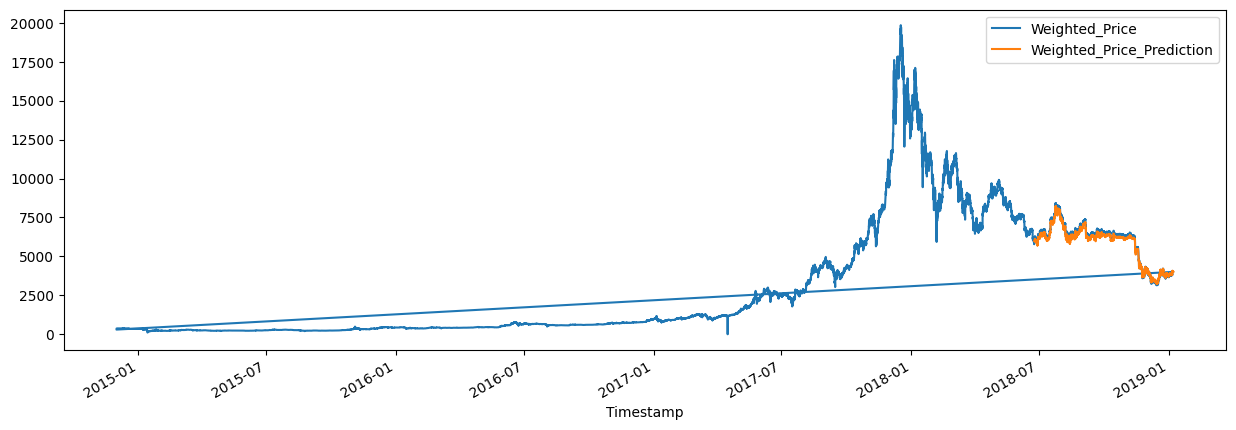

In [18]:
_ = data_all[['Weighted_Price', 'Weighted_Price_Prediction']].plot(figsize=(15, 5))

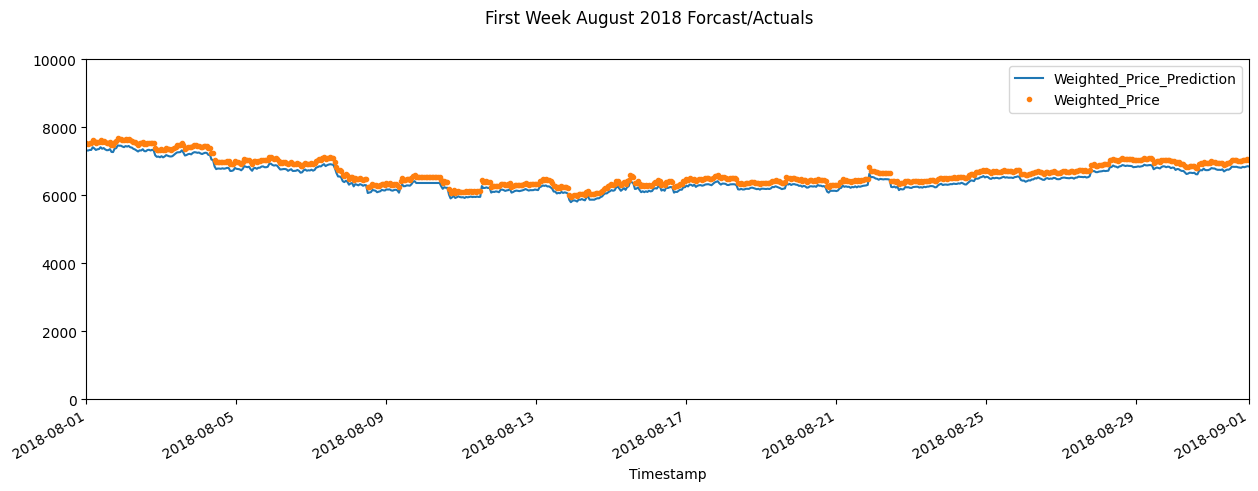

In [21]:
# Plotting the forecast w/ actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = data_all[['Weighted_Price_Prediction', 'Weighted_Price']].plot(ax=ax, style=['-', '.'])
ax.set_xbound(lower='08-01-2018', upper='09-01-2018')
ax.set_ylim(0, 10000)
plot = plt.suptitle('First Week August 2018 Forcast/Actuals')

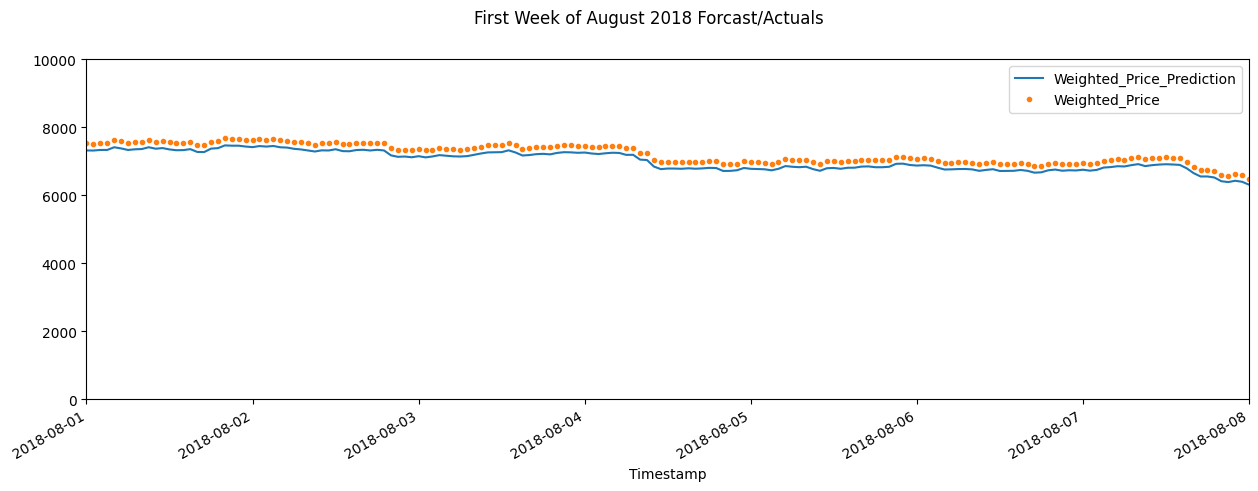

In [23]:
# Somehow I skipped multiple code blocks
# Leading to an error for a piece of code that wasn't ready to run
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = data_all[['Weighted_Price_Prediction', 'Weighted_Price']].plot(ax=ax, style=['-', '.'])
ax.set_xbound(lower='08-01-2018', upper='08-08-2018')
ax.set_ylim(0, 10000)
plot = plt.suptitle('First Week of August 2018 Forcast/Actuals')

In [25]:
# More imports in the middle of code
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(y_true=data_test['Weighted_Price'],
                   y_pred=data_test['Weighted_Price_Prediction'])

25022.996409912044